In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties import unumpy as unp
import array_to_latex as a2l
import csv
import pandas as pd
from astropy.io.votable import parse
from astropy.table import QTable, Table, Column

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) #font na grafih je LaTexov
rc('text', usetex=True)



In [2]:
def linearna (x, k, n): 
    return k*x + n

In [6]:
#testiranje 

data = np.loadtxt('meritve/500.txt')

print(data[:, 0])

[0.3906 0.3987 0.4127 0.4184 0.4244 0.4292 0.4326 0.4355 0.4397 0.4415
 0.4436 0.4471 0.4481 0.4515 0.4534 0.4553 0.4579 0.4607 0.4616 0.4637
 0.4656 0.4676 0.4695 0.4707 0.4717 0.4733 0.4742 0.4762 0.4777 0.479
 0.4804 0.4818 0.483  0.4847 0.4857 0.4863 0.4882 0.4902 0.4913 0.493
 0.4944 0.4964 0.4974 0.4984 0.5006 0.5029 0.5062 0.509  0.5122 0.5137
 0.5162 0.5182 0.5201 0.5273 0.53   0.5337 0.5379 0.5399 0.5514 0.5591
 0.5686 0.5814 0.5814]


[287.95+/-0.444] [8.646591039904113e-05+/-3.4297298020140703e-07] [1.3851838845926388e-23+/-5.49442714282654e-26]
[304.75+/-0.948] [8.612499010450365e-05+/-3.8625938872028047e-07] [1.3797223414741483e-23+/-6.187875407298893e-26]
[328.15+/-1.65] [9.097339910578351e-05+/-8.644197196456887e-07] [1.457393853674652e-23+/-1.3848003908723933e-25]


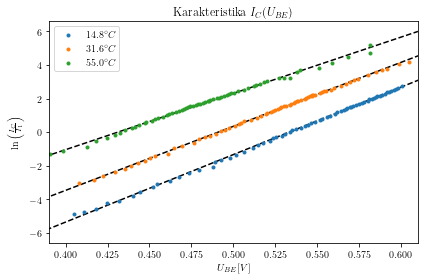

In [30]:
# podatki za prvo meritev

fig, ax = plt.subplots()

I = 10e-6

for name, temp in zip(* [['meritve/148.txt', 'meritve/316.txt', 'meritve/500.txt'], [14.8, 31.6, 55.0]]): #prvi seznam ima imena datotek, kjer so podatki, drugi seznam ima temperature pri katerih je bilo merjeno - za legendo na grafu, spremeni po potrebi
    data = np.loadtxt(name)
    U = data[:, 0]
    I_i = data[:, 1]

    ax.scatter(U, np.log(I_i / I), marker='.', label=f'${temp}^\circ C$') #točke na grafu

    par, cov = curve_fit(linearna, np.log(I_i / I), U) #regresija za napetost v odvisnosti od toka, medtem ko je spodnji graf tok v odvisnosti od napetosti!

    m, c = par
    dm, dc = np.sqrt(np.diag(cov))

    m = unp.uarray([m], [dm])

    T = unp.uarray([temp + 273.15], [temp * 0.03])

    ke_0 = m / T #računanje k_b * e_0

    e_0 = 1.602e-19

    k = ke_0 * e_0

    print(T, ke_0, k) # izpiše ti temperaturo, vrednost k_b * e_0 in vrednost Boltzmannove konstante

    log_I_i = np.linspace(-6, 6) # numpy array za logaritem toka, spreminjaj številke po potrebi glede na svoje podatke (opazuj y-os na grafu)

    ax.plot(linearna(log_I_i, *par), log_I_i, linestyle='--', color='k', zorder=-1) #risanje grafa, pazi, da se riše x os v odvisnosti od y in ne obratno!

    ax.set_xlim(0.39, 0.61) #spreminjaj omejitev x osi po potrebi, da se prikažejo vse meritve 
    ax.set_title(r'Karakteristika $I_C(U_{BE})$')
    ax.set_xlabel(r'$U_{BE} [V]$')
    ax.set_ylabel(r'$\ln \left(\frac{I_C}{I_1}\right)$')
ax.legend()
fig.tight_layout()
fig.savefig('1graf.pdf')



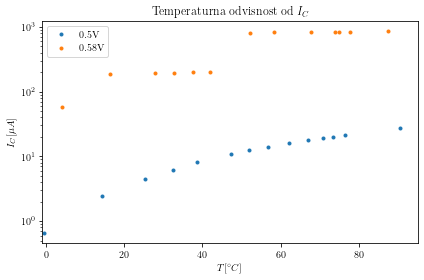

In [28]:
fig, ax = plt.subplots()

for name, volt in zip(*[['meritve/5V.txt', 'meritve/580.txt'], [0.5, 0.58]]): #prvi seznam je za lokacijo datoteke, drugi seznam je pri kateri napetosti je bila merjena odvisnost 
    data = np.loadtxt(name)
    I_c = data[:, 1]
    T = data[:, 0]
    ax.scatter(T, 1e6 * I_c, marker='.', label=f'{volt}V')
    ax.set_xlim(-1, 95) #spreminjaj limito x osi po potrebi (od najnižje temperature + 1 do najvišje + 1 )
    ax.set_title(r'Temperaturna odvisnost od $I_C$')
    ax.set_xlabel(r'$T[^\circ C]$')
    ax.set_ylabel(r'$I_C [\mu A]$')
    ax.set_yscale('log') #logaritemska skala 
ax.legend()
fig.tight_layout()
fig.savefig('2graf.pdf')